<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [47]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [48]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [12]:
#Task 1: Familiarize yourself with the dataset

#Variables
#CRIM - per capita crime rate by town
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS - proportion of non-retail business acres per town.
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX - nitric oxides concentration (parts per 10 million)
#RM - average number of rooms per dwelling
#AGE - proportion of owner-occupied units built prior to 1940
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#TAX - full-value property-tax rate per $10,000
#PTRATIO - pupil-teacher ratio by town
#LSTAT - % lower status of the population
#MEDV - Median value of owner-occupied homes in $1000's

boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [141]:
# Let's inspect the data 

boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  AGE_GROUP   506 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 57.4+ KB


In [142]:
# We get some descriptive statistics of each variable

boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


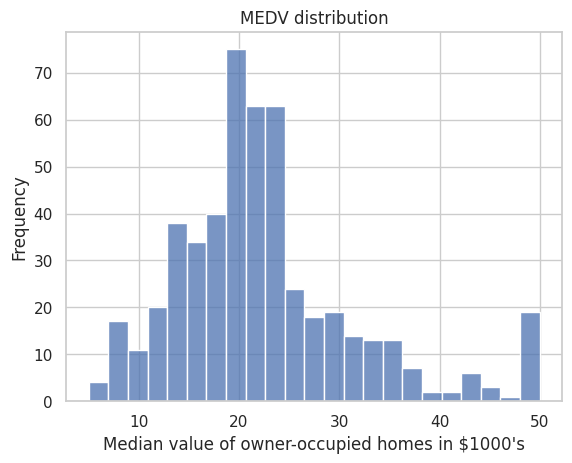

In [143]:
# First we create a histogram just to get more info about MEDV

sns.histplot(boston_df['MEDV'])
pyplot.title('MEDV distribution')
pyplot.xlabel("Median value of owner-occupied homes in $1000's")
pyplot.ylabel('Frequency')
pyplot.show()

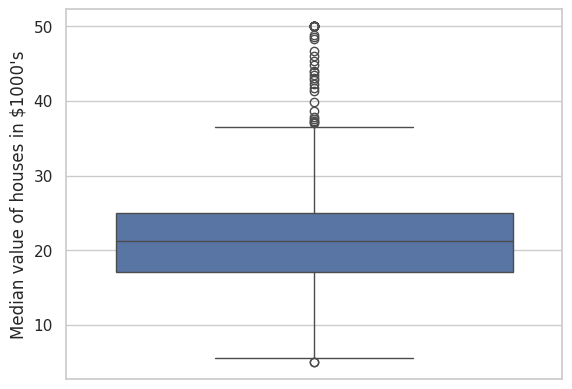

In [58]:
# Boxplot for Median value of owner-occupied homes

ax = sns.boxplot(y="MEDV", data=boston_df)
pyplot.ylabel("Median value of houses in $1000's")
pyplot.show()

# We can see that the majority of the MEDV fall betweeen 17 and 25. Also, there are many outliers.

In [78]:
# Let's see how many are 0 and 1

boston_df.groupby('CHAS').agg({'CHAS': ['count']}).reset_index()

CHAS      
       count
0  0.0   471
1  1.0    35

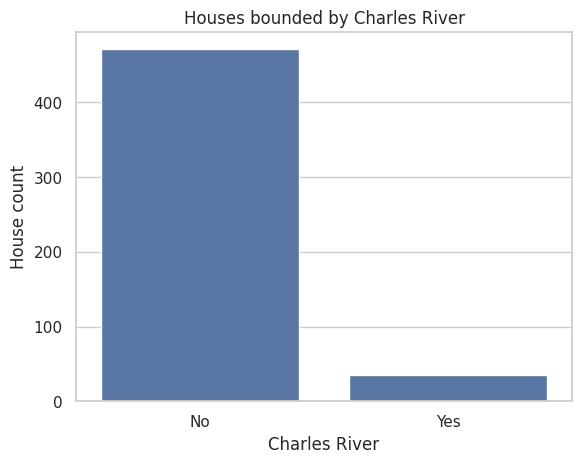

In [38]:
# Bar plot for the Charles river variable

sns.set(style="whitegrid")
ax = sns.countplot(x="CHAS", data=boston_df)
pyplot.title("Houses bounded by Charles River")
pyplot.xlabel("Charles River")
pyplot.ylabel("House count")
ax.set_xticks([0, 1])  
ax.set_xticklabels(['No', 'Yes']) # Changes 0 to No and 1 to Yes
pyplot.show()

# We see that the number of houses bounded by the Charles River is very is small (35, from the table
# above) compared to the number of houses that are not bounded by the river (471).

In [66]:
# We discretize the variable AGE into AGE_GROUPS

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

# Let's see the new column to verify

boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years


In [72]:
# Let's visualize some data statistics for each AGE_GROUP

boston_df.groupby('AGE_GROUP').agg({'MEDV': ['count', 'mean', 'std']}).reset_index()

AGE_GROUP  MEDV                     
                           count       mean       std
0     35 years and younger    91  27.775824  7.638198
1       70 years and older   287  19.793380  9.515375
2  Between 35 and 70 years   128  24.947656  6.969370

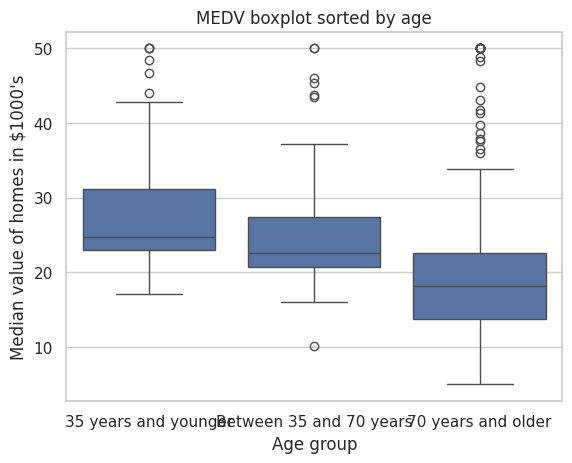

In [100]:
# Boxplot for the MEDV variable vs AGE variable

label_order = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, order=label_order)
pyplot.title("MEDV boxplot sorted by age")
pyplot.xlabel("Age group")
pyplot.ylabel("Median value of homes in $1000's")
pyplot.show() 

# There is a problem with this because AGE was a proportion of units built prior to 1940 and not age
# so we are not really getting, for example, '35 years or younger' but we're getting 
# '35% or less of the houses were built prior to 1940'.

# We can say that as the percentage of houses built prior to 1940 increases the median value of homes
# seems to decrease. So a town with a greater proportion of houses built prior to 1940 will have a 
# smaller median value of homes. Although there are many outliers. With ANOVA we could conclude with
# more certainty.

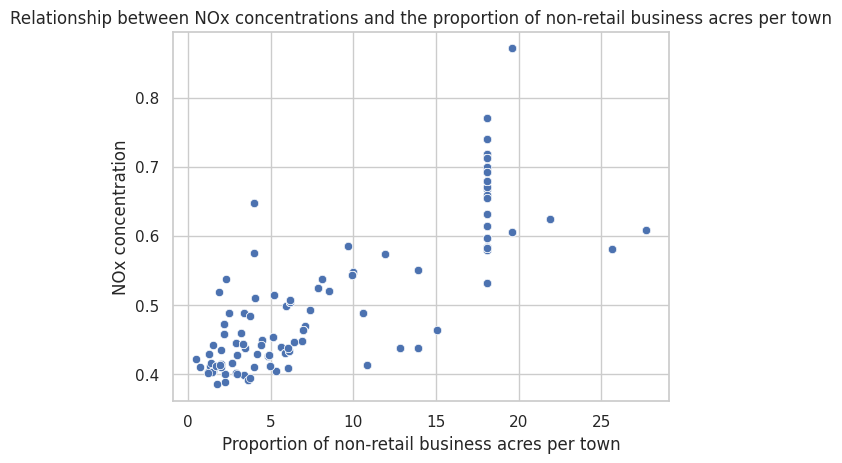

In [144]:
# Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of
# non-retail business acres per town

sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title("Relationship between NOx concentrations and the proportion of non-retail business acres per town")
pyplot.xlabel("Proportion of non-retail business acres per town")
pyplot.ylabel("NOx concentration")
pyplot.show()

# It looks like NOX concentrations is related to the proportion of non-retail business acres per town,
# as INDUS increases NOX also seems to increase.

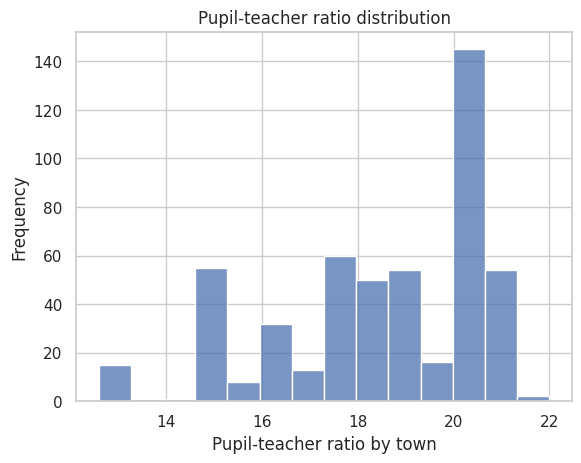

In [113]:
# Histogram for the pupil to teacher ratio variable

sns.histplot(boston_df['PTRATIO'])
pyplot.title("Pupil-teacher ratio distribution")
pyplot.xlabel("Pupil-teacher ratio by town")
pyplot.ylabel("Frequency")
pyplot.show()

# We can see that

In [111]:
# Is there a significant difference in median value of houses bounded by the Charles River 
# or not? (T-test for independent samples)

# Let's separate the data

MEDV_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']
MEDV_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Let's test equality of variance
# H0 : population variances are the same
# H1 : population variances are different
# α = 0.05

scipy.stats.levene(MEDV_not_bounded, MEDV_bounded, center='mean')

# Since the p-value is smaller than α = 0.05 we reject H0 and they samples have different variances

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [112]:
# Let's perform the T-test
# H0 : MEDV is the same for both groups
# H1 : MEDV is different for the groups
# α = 0.05

scipy.stats.ttest_ind(MEDV_not_bounded, MEDV_bounded, equal_var = False)

# Since the p-value is smaller than α = 0.05 we reject H0 and conclude that there exist a difference in
# in the median value of houses bounded by the Charles River

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

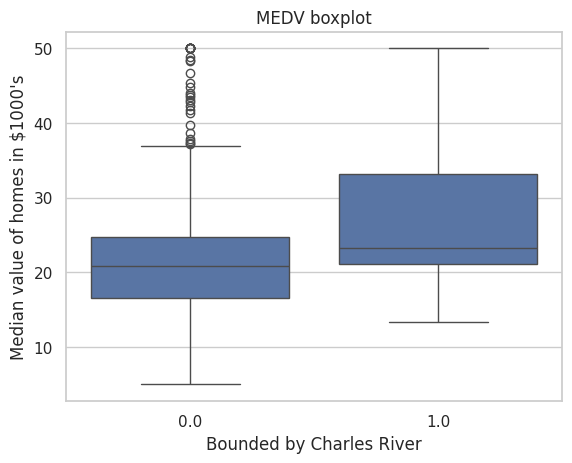

In [104]:
# Boxplot for the MEDV variable vs CHAS

sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
pyplot.title("MEDV boxplot")
pyplot.xlabel("Bounded by Charles River")
pyplot.ylabel("Median value of homes in $1000's")
pyplot.show()

In [114]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied 
# units built prior to 1940 (AGE)? (ANOVA)

# We define the groups to compare (same as before)

group1 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

# Levene's test first
# H0 : population variances are the same
# H1 : population variances are different
# α = 0.05

scipy.stats.levene(group1, group2, group3, center='mean')

# Our p-value is 0.0630 which is greater than α = 0.05, so we fail to reject H0 and assume the groups
# have the same variance and we can perform the ANOVA as shown before

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [117]:
# ANOVA
# H0 : the mean of MEDV is the same for each gruop
# H1 : at least one of the groups has a different mean
# α = 0.05

f_statistic, p_value = scipy.stats.f_oneway(group1, group2, group3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# The p-value is 1.71e-15, which is much smaller than α = 0.05, so we can reject H0 and state that
# there are significant differences in the mean value of MEDV between groups.

# This result can be visualized the boxplot created before, where you can easily see the differences 
# between the groups created.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [118]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion 
# of non-retail business acres per town? (Pearson Correlation)

# H0 : NOX is not related to INDUS
# H1 : NOX is related to INDUS
# α = 0.05

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

# Our p-value is much smaller than α = 0.05 so we reject H0 and conclude that NOX is indeed 
# related to INDUS. 

# The value for the pearson correlation coefficient is 0.7637 which indicates a positive relationship
# between NOX concentration and INDUS. This means that as the proportion of non-retail businesss 
# increase, NOX concentration seems to increase.

# The R^2 is 0.5832 which means that approximately 58.32% of the variability in the concentration of 
# NOX can be explained by INDUS.

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [134]:
# Let's obtain the parameters of the linear regression

X = boston_df['INDUS']
y = boston_df['NOX']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           7.91e-98
Time:                        14:25:18   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.0

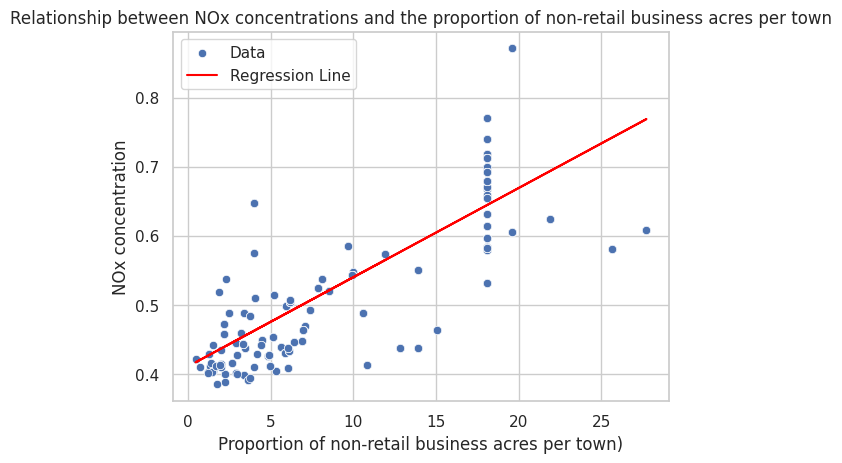

In [135]:
# Let's add the regression line to the scatter plot made before

sns.scatterplot(x='INDUS', y='NOX', data=boston_df, label='Data')
pyplot.title("Relationship between NOx concentrations and the proportion of non-retail business acres per town")
pyplot.xlabel("Proportion of non-retail business acres per town)")
pyplot.ylabel("NOx concentration")

line = model.predict(X)
pyplot.plot(boston_df['INDUS'], line, color='red', label='Regression Line')

pyplot.legend()
pyplot.show()

In [139]:
# What is the impact of an additional weighted distance  to the five Boston employment centres 
# on the median value of owner occupied homes? (Regression analysis)

# H0 : MEDV is not related to DIS
# H1 : MEDV is related to DIS
# α = 0.05

# Let's do the same as before
X2 = boston_df['DIS']
y2 = boston_df['MEDV']
X2 = sm.add_constant(X2)

model2 = sm.OLS(y2, X2).fit()
predictions2 = model2.predict(X2)

# Print out statistics
print(model2.summary())

# The p-value shown for DIS is 0.000 which is smaller than α = 0.05, se we can conclude that the median
# value of owner-occupied homes is related to the weighted distance to the 5 Boston employement centers.

# Since the R^2 value is relatively small (0.062) so the correlation is weak. Approximately 6.2% of the 
#variability in MEDV can be explained by DIS. This means that there might be other factors 
# that influence MEDV.

# The coefficient for DIS is 1.0916 so in average, for an increasement of 1 unit of distance, the MEDV 
# increases in 1.0916 units. But as stated before, the correlation is weak.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        14:33:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

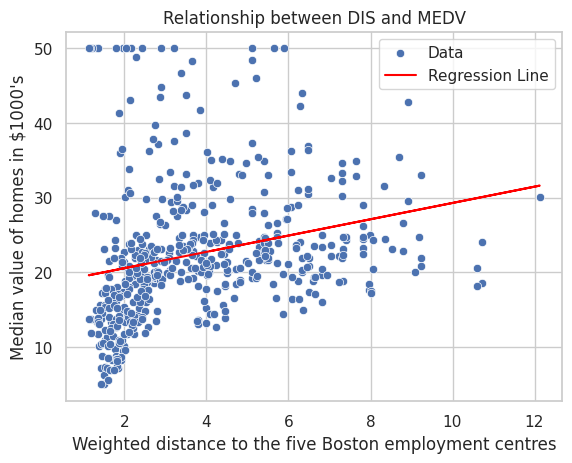

In [140]:
# Let's create a scatter plot to visualize the regression with the data

sns.scatterplot(x='DIS', y='MEDV', data=boston_df, label='Data')
pyplot.title("Relationship between DIS and MEDV")
pyplot.xlabel("Weighted distance to the five Boston employment centres")
pyplot.ylabel("Median value of homes in $1000's")

line2 = model2.predict(X2)
pyplot.plot(boston_df['DIS'], line2, color='red', label='Regression Line')

pyplot.legend()
pyplot.show()